## Analyze A/B Test Results
Shahad AlShayiqi

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [197]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [198]:
# read the CSV file and show head of the dataset
df = pd.read_csv("ab_data.csv")
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [199]:
# General info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


294478 Rows

In [200]:
# save the number of rows for future uses.
num_rows = df.shape[0]

c. The number of unique users in the dataset.

In [201]:
# use unique method to show how many unique User_id
ui = df.user_id.nunique()
ui

290584

290584 , Number of unique users .

d. The proportion of users converted.

In [202]:
# converted = 1 in converted column .
df[df.converted == 1].user_id.count()/num_rows


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [203]:
# first we well calculate number of times the 'new_page' match 'control'
# seconed calculate number of times the 'old_page' match 'treatment'
# finaly calculate the sum of these two values .

new_notTr = df[(df.landing_page == 'new_page') & (df.group == 'control')].user_id.count()

old_treat = df[(df.landing_page == 'old_page') & (df.group == 'treatment')].user_id.count()

num_dont_match = new_notTr + old_treat
print ('number of times the `new_page` and `treatment` do not match:', num_dont_match)

number of times the `new_page` and `treatment` do not match: 3893


f. Do any of the rows have missing values?

In [204]:
# WOW we dont have any missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [205]:
#remove the mismatch rows

df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [206]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [207]:
# save the number of rows for future uses.
num_rows2 = df2.shape[0]
num_rows2

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [208]:
# use unique method to show how many unique User_id
ui2 = df2.user_id.nunique()
ui2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [209]:
# full info of duplicated user_id 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [210]:
# same result as shown above
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [211]:
# drop by label , drop the row with the oldest timestamp
df2.drop(labels=1899, inplace=True)

In [212]:
# double check
df2.user_id.nunique()

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [213]:
#calculate probability of an individual converting regardless of the page they receive by using converted coloumn
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [214]:
# calculate the probability of indiviuals in the Control group and converted 
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [215]:
# calculate the probability of indiviuals in the treatment group and converted 
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [216]:
df2[df2.landing_page == 'new_page'].user_id.count()/num_rows2

0.50006022334256761

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

1- We have 290,584 people and 50% of them have received the new page. 

2-  The percentage of those who converted from the old page to the new page (12.04) is slightly greater than those who converted from the new page to the old (11.8) ratios are close,

3- so we cannot be certain that the new page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: OldPage - NewPage >= 0**


**H1: NewPage - OldPage > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [217]:
#calculate how many users were converted
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [218]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

There is no difference between conversion rates for the old and new page.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [219]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [220]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [221]:
new_page_converted = np.random.binomial(1,p_new,n_new).mean()
new_page_converted


0.11995045076044319

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [222]:
old_page_converted = np.random.binomial(1,p_old,n_old).mean()
old_page_converted


0.12031746905846882

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [223]:
new_page_converted - old_page_converted

-0.00036701829802562869

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [224]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

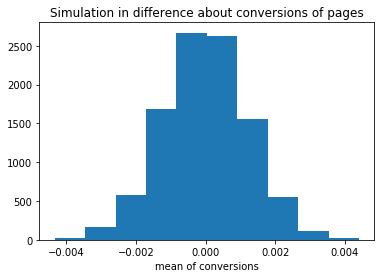

In [225]:
# first we well convert p_diffs to numpy array.
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);
plt.title('Simulation in difference about conversions of pages');
plt.xlabel('mean of conversions');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [226]:
observerd_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

(p_diffs > observerd_diff).mean()

0.90390000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1- I have calculated a value called 'P-value' in scientific studies.

2- 'P-value' makes me decide whether to reject the null value or not.

3- If 'P-value' is greater than 0.5, we must adhere to the null hypothesis, but if P-value is less than 0.5, we must reject the null hypothesis

4- The 'P-value' is close to (1) Then we must stick to the null hypothesis that the old page is more perferable for users, and the new page is not.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [227]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count() 
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count() 
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [228]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new ], [n_old,n_new ], alternative='smaller')
print(p_value)
print(z_score)

0.905058312759
1.31092419842


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

1- With a type 1 error rate of 0.05, Z-score above 1.96 would be significant, but in this case it is not. the p-value remains high enough that we may fail to reject the null hypothesis,and the p-value 0.9050 is very close to the value p that we previously calculated in j part 0.9041.

2- It means that we stick to the old page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [229]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df2.group)
df2.drop('control', axis = 1,inplace = True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [230]:
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [231]:
results = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [232]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-28 02:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

1-The p-value associated with ab_page is 0.190

2-The p-value here is greater than the above p-value

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We could add column that record how much the user spent time in the website in the new page and the old one



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [233]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [234]:
df_new.country.unique()


array(['UK', 'US', 'CA'], dtype=object)

In [235]:
# Create the necessary dummy variables
df_new['intercept'] = 1

df_new[['UK','US','CA']] = pd.get_dummies(df_new['country'])

In [236]:
df_new.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [237]:
# Fit Linear Model And Obtain the Results
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
lm = sm.Logit(df_new['converted'], df_new[['intercept','CA_ab_page','UK_ab_page','CA','US']])
results = lm.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-28 02:37 AIC:              212780.8857
No. Observations:   290584           BIC:              212833.7840
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
CA_ab_page    -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
UK_ab_page    -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US             0.0172    0.0382    0.4504  0.6524  -0.0576   0.0920
==================================================================

"""

<a id='conclusions'></a>
## conclusions:

1- There is no significance in the probability value of all the variables, so we do not have enough evidence that the country has any activity in the pages, so we fail to reject the null hypothesis.

2- To look at the big picture, we don't have any enough evidence that most people in our data set move from the old page to the new page, so we fail to reject the null hypothesis

3- In the end we have to stick to our old page based on the information we interpreted in the dataset






In [238]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0


#### I have used resources to help me with this project:
1-https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

2-https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf.

3- https://github.com/jrf0962/DAND_project3_analyze_AB_test_results/blob/master/analyze_AB_test_results/Analyze_ab_test_results_notebook.ipynb.


Thanks a lot :)